<a href="https://colab.research.google.com/github/hburnt/Machine-Learning/blob/main/intro_to_ml/SVM/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
def featureExtraction(kernelFunction, inputs, feature_amount):
  pca = KernelPCA(n_components=feature_amount, kernel = kernelFunction)
  principalComponents = pca.fit_transform(inputs)
  principalDF = pd.DataFrame(data = principalComponents)
  updatedInputs = principalDF.values
  return updatedInputs

In [71]:
def printTest(feature_amount, kernelFunction, report):
  print("Amount of features:", feature_amount)
  print("Kernel function used:", kernelFunction)
  print("Mean Squared Error: ", report)
  print("-------------------------------------------------------------")

Amount of features: 1
Kernel function used: linear
Mean Squared Error:  0.535
-------------------------------------------------------------
Amount of features: 2
Kernel function used: linear
Mean Squared Error:  0.53
-------------------------------------------------------------
Amount of features: 5
Kernel function used: linear
Mean Squared Error:  0.538
-------------------------------------------------------------
Amount of features: 10
Kernel function used: linear
Mean Squared Error:  0.536
-------------------------------------------------------------
Amount of features: 12
Kernel function used: linear
Mean Squared Error:  0.521
-------------------------------------------------------------
Amount of features: 15
Kernel function used: linear
Mean Squared Error:  0.521
-------------------------------------------------------------


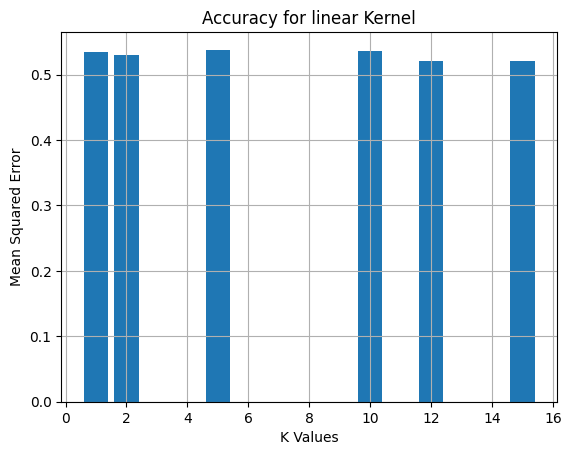

Amount of features: 1
Kernel function used: sigmoid
Mean Squared Error:  5504.001
-------------------------------------------------------------
Amount of features: 2
Kernel function used: sigmoid
Mean Squared Error:  3519.149
-------------------------------------------------------------
Amount of features: 5
Kernel function used: sigmoid
Mean Squared Error:  1168.742
-------------------------------------------------------------
Amount of features: 10
Kernel function used: sigmoid
Mean Squared Error:  525.365
-------------------------------------------------------------
Amount of features: 12
Kernel function used: sigmoid
Mean Squared Error:  491.711
-------------------------------------------------------------
Amount of features: 15
Kernel function used: sigmoid
Mean Squared Error:  613.272
-------------------------------------------------------------


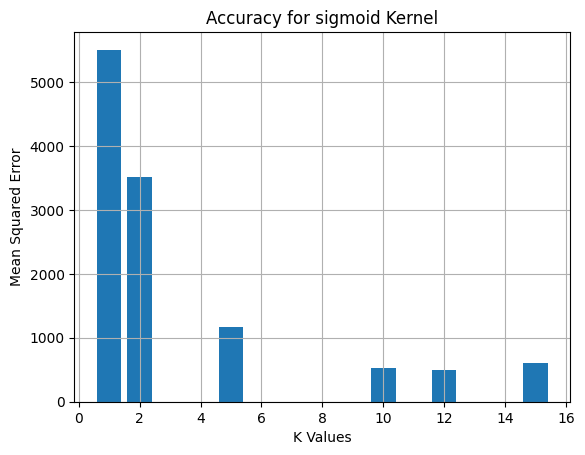

Amount of features: 1
Kernel function used: rbf
Mean Squared Error:  0.702
-------------------------------------------------------------
Amount of features: 2
Kernel function used: rbf
Mean Squared Error:  0.602
-------------------------------------------------------------
Amount of features: 5
Kernel function used: rbf
Mean Squared Error:  0.718
-------------------------------------------------------------
Amount of features: 10
Kernel function used: rbf
Mean Squared Error:  0.929
-------------------------------------------------------------
Amount of features: 12
Kernel function used: rbf
Mean Squared Error:  0.852
-------------------------------------------------------------
Amount of features: 15
Kernel function used: rbf
Mean Squared Error:  0.881
-------------------------------------------------------------


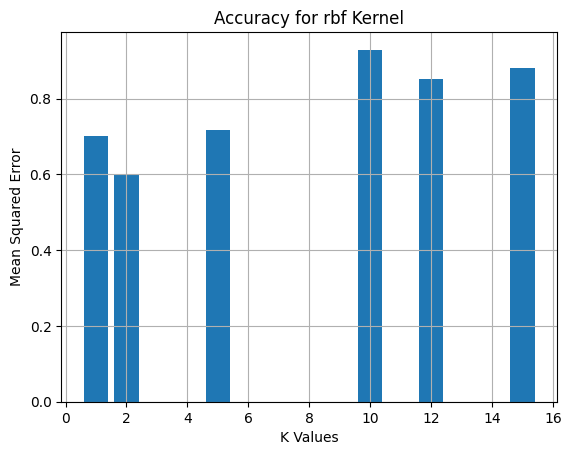

Amount of features: 1
Kernel function used: poly
Mean Squared Error:  0.926
-------------------------------------------------------------
Amount of features: 2
Kernel function used: poly
Mean Squared Error:  7.076
-------------------------------------------------------------
Amount of features: 5
Kernel function used: poly
Mean Squared Error:  4.97
-------------------------------------------------------------
Amount of features: 10
Kernel function used: poly
Mean Squared Error:  12.324
-------------------------------------------------------------
Amount of features: 12
Kernel function used: poly
Mean Squared Error:  29.557
-------------------------------------------------------------
Amount of features: 15
Kernel function used: poly
Mean Squared Error:  9.183
-------------------------------------------------------------


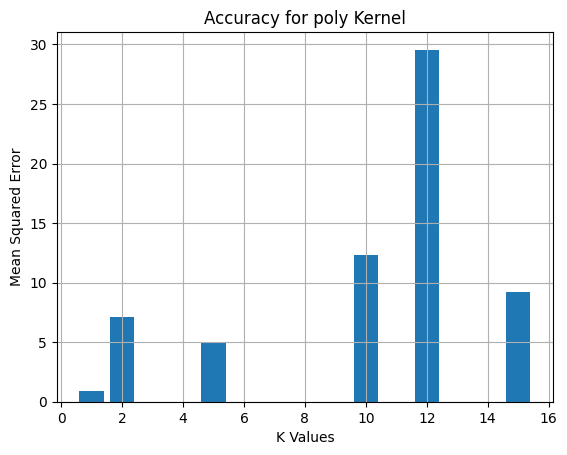

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

url = 'https://raw.githubusercontent.com/hburnt/Intro-to-ML-datasets/main/Housing.csv'

df = pd.DataFrame(pd.read_csv(url))

# Apply a binary map top to the inputs with "yes" or "no" as their value
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
  return x.map({'yes': 1, 'no':0})

df[varlist] = df[varlist].apply(binary_map)

inputs = df.iloc[:,1:12].values
outputs = df.iloc[:,0].values
outputs = np.reshape(outputs,(-1,1))

# Pre processing inputs and outputs
sc = StandardScaler()
inputs = sc.fit_transform(inputs)
outputs = sc.fit_transform(outputs)
outputs = np.ravel(outputs)

# Testing different kernel functions
kernelFunctions = ['linear', 'sigmoid', 'rbf', 'poly']
kernelFunctions_last_index = len(kernelFunctions)
K = [1, 2, 5, 10, 12, 15]

for i in range(0,kernelFunctions_last_index):
  msqe_scores = []
  for N in K:
    #Looping through different values for K and the different kernel functions
    newInputs = featureExtraction(kernelFunctions[i], inputs, N)
    train_inputs, test_inputs, train_outputs, test_outputs = train_test_split(newInputs, outputs, test_size = 0.2, random_state=0)
    model = SVR(kernel=kernelFunctions[i], C=300)
    model.fit(train_inputs, train_outputs)
    Output_prediction = model.predict(test_inputs)

    score = float(format(np.sqrt(mean_squared_error(test_outputs, Output_prediction)), '.3f'))
    msqe_scores.append(score)
    printTest(N, kernelFunctions[i], score)
  # Plotting the mean square error of each kernel and K value
  plt.bar(K[0:6], msqe_scores[0:6])
  plt.ylabel('Mean Squared Error')
  plt.xlabel('K Values')
  plt.title(f'Accuracy for %s Kernel' % kernelFunctions[i])
  plt.grid()
  plt.show()

